In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june = extract('month', Measurement.date)==6

In [5]:
#  3. Convert the June temperatures to a list.
june_results = []
june_results = session.query(Measurement.date, Measurement.tobs).filter(june).all()


In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results, columns=["date", "June Temps"])

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [11]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december = extract('month', Measurement.date)==12

In [12]:
december_results = []
december_results = session.query(Measurement.date, Measurement.tobs).filter(december).all()

In [14]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(december_results, columns=['date', 'December Temps'])

In [15]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


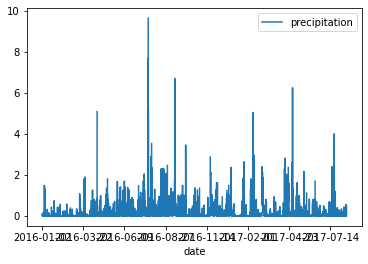

In [16]:
### Precipitation over a year
prev_year = dt.date(2017, 1, 1) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

df = pd.DataFrame(results, columns=['date','precipitation'])


df.set_index(df['date'], inplace=True)
df = df.sort_index()

df.plot();

In [18]:
df.describe()

,precipitation
count,3330.000000
mean,0.174862
std,0.487472
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,9.640000


In [19]:
results_June = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
results_June
precipitation_June= list(results_June)
precipitation_June

[('2010-06-01', 0.0),
 ('2010-06-02', 0.01),
 ('2010-06-03', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-06', 0.0),
 ('2010-06-07', 0.0),
 ('2010-06-08', 0.0),
 ('2010-06-09', 0.0),
 ('2010-06-10', 0.0),
 ('2010-06-11', 0.0),
 ('2010-06-12', 0.0),
 ('2010-06-13', 0.0),
 ('2010-06-14', 0.0),
 ('2010-06-15', 0.0),
 ('2010-06-16', 0.0),
 ('2010-06-17', 0.0),
 ('2010-06-18', 0.0),
 ('2010-06-19', 0.0),
 ('2010-06-20', 0.0),
 ('2010-06-21', 0.0),
 ('2010-06-22', 0.0),
 ('2010-06-23', 0.0),
 ('2010-06-24', 0.0),
 ('2010-06-25', 0.0),
 ('2010-06-26', 0.02),
 ('2010-06-27', 0.0),
 ('2010-06-28', 0.0),
 ('2010-06-29', 0.0),
 ('2010-06-30', 0.0),
 ('2011-06-01', 0.07),
 ('2011-06-02', 0.0),
 ('2011-06-03', 0.56),
 ('2011-06-04', 0.89),
 ('2011-06-05', 0.0),
 ('2011-06-06', 0.0),
 ('2011-06-07', 0.0),
 ('2011-06-08', 0.03),
 ('2011-06-09', 0.01),
 ('2011-06-10', 0.0),
 ('2011-06-11', 0.0),
 ('2011-06-12', 0.0),
 ('2011-06-13', 0.0),
 ('2011-06-14', 0.0),
 ('2011-06-15', 0.0),
 ('

In [20]:
june_rain_df = pd.DataFrame(precipitation_June, columns=['date','June Precipitation'])
june_rain_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [21]:
results_Dec = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
results_Dec
precipitation_Dec= list(results_Dec)
precipitation_Dec

[('2010-12-01', 0.04),
 ('2010-12-03', 0.0),
 ('2010-12-04', 0.0),
 ('2010-12-06', 0.0),
 ('2010-12-07', 0.0),
 ('2010-12-08', 0.0),
 ('2010-12-09', 0.0),
 ('2010-12-10', 1.58),
 ('2010-12-11', 0.77),
 ('2010-12-12', 0.0),
 ('2010-12-13', 0.0),
 ('2010-12-14', 0.0),
 ('2010-12-15', 0.0),
 ('2010-12-16', 0.0),
 ('2010-12-17', 0.0),
 ('2010-12-18', 0.0),
 ('2010-12-19', 1.4),
 ('2010-12-23', 0.0),
 ('2010-12-24', 0.0),
 ('2010-12-26', None),
 ('2010-12-27', 0.13),
 ('2010-12-28', 0.55),
 ('2010-12-29', 0.06),
 ('2010-12-30', 0.01),
 ('2010-12-31', 0.0),
 ('2011-12-01', 0.03),
 ('2011-12-02', 0.08),
 ('2011-12-03', 0.0),
 ('2011-12-04', 0.0),
 ('2011-12-05', 0.0),
 ('2011-12-06', 0.0),
 ('2011-12-07', 0.0),
 ('2011-12-08', 0.0),
 ('2011-12-09', 0.13),
 ('2011-12-10', 0.07),
 ('2011-12-11', 0.07),
 ('2011-12-12', 0.08),
 ('2011-12-13', 0.4),
 ('2011-12-14', 0.7),
 ('2011-12-15', 0.0),
 ('2011-12-16', 0.01),
 ('2011-12-17', 0.07),
 ('2011-12-18', 0.02),
 ('2011-12-19', 0.15),
 ('2011-12-20'

In [22]:
december_rain_df = pd.DataFrame(precipitation_Dec, columns=['date','December Precipation'])
december_rain_df.describe()

,December Precipation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
